**Supervised Learning Model using Simple Linear Regression for predicting percentage of a student based on number of study hours**

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [3]:
# Reading data from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


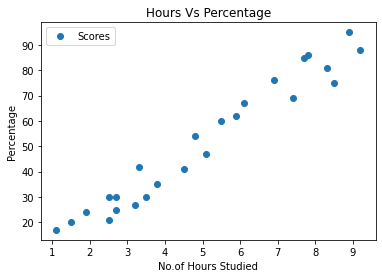

In [5]:
# Plotting distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Vs Percentage')  
plt.xlabel('No.of Hours Studied')  
plt.ylabel('Percentage')  
plt.show()

It is evident from the graph above that there is a positive linear relationship between the number of hours spent studying and score percentage

###**Data Preparation**

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

We have split the data into training and testing data. For that I am using train_test_split method from scikit learn 

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### **Training Algorithm**
 

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed Succesfully.")

Training completed Succesfully.


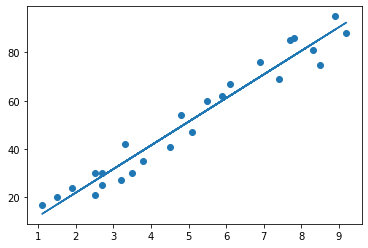

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [23]:
print("Correlation :",data.corr())

Correlation :            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


There is Positive Linear Correlation between no.of hours and percentage score



In [11]:
# Testing data - In Hours
print(X_test)

# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [12]:
# Comparing the result
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [19]:
# Testing with our own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[[0]]))

No of Hours = [[9.25]]
Predicted Score = [92.91505723]


### **Model Evaluation**

Now it's time to evaluate our model. Mean Absolute Error is an evaluation metric used to evaluate the performance of the model

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651
